<a href="https://colab.research.google.com/github/2303a52163/SML_2303a52163/blob/main/SML11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1 . Read the data with pandas and find features and target variables**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [ ]:
data=pd.read_csv("/content/breast_cancer_survival (1).csv")
data.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


In [ ]:
data.replace('FEMALE', 0, inplace=True)
data.replace('MALE', 1, inplace=True)
data.replace('Positive', 1, inplace=True)
data.replace('Negative', 0, inplace=True)
data.replace('Dead', 0, inplace=True)
data.replace('Alive', 1, inplace=True)

data.replace('II', 2, inplace=True)
data.replace('III', 3, inplace=True)
data.replace('I', 1, inplace=True)


data.replace('Infiltrating Ductal Carcinoma', 1, inplace=True)
data.replace('Infiltrating Lobular Carcinoma', 2, inplace=True)
data.replace('Mucinous Carcinoma', 3, inplace=True)

data.replace('Other', 0, inplace=True)
data.replace('Lumpectomy', 1, inplace=True)
data.replace('Modified Radical Mastectomy', 2, inplace=True)
data.replace('Simple Mastectomy', 3, inplace=True)

In [ ]:
data.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,0,0.95256,2.15000,0.007972,-0.048340,2,1,1,1,0,0,20-May-18,26-Aug-18,1.0
1,54,0,0.00000,1.38020,-0.498030,-0.507320,2,1,1,1,0,0,26-Apr-18,25-Jan-19,0.0
2,63,0,-0.52303,1.76400,-0.370190,0.010815,2,1,1,1,0,1,24-Aug-18,08-Apr-20,1.0
3,78,0,-0.87618,0.12943,-0.370380,0.132190,1,1,1,1,0,0,16-Nov-18,28-Jul-20,1.0
4,42,0,0.22611,1.74910,-0.543970,-0.390210,2,1,1,1,1,1,12-Dec-18,05-Jan-19,1.0


# **2 . Find target variable**

In [ ]:
x=data.drop(['Patient_Status','Date_of_Surgery','Date_of_Last_Visit'],axis=1)
y=data['Patient_Status']

In [ ]:
y.isnull().sum()
y.fillna(0,inplace=True)

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x,y=smote.fit_resample(x,y)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# **3 . Train SVM, KNN, Logistic regression and find accuracy**

In [ ]:
import torch
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f"Using device: {device}")

Using device: cpu


In [ ]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [ ]:
accuracy_list=[]
l=[]
for i in range(1,6):
  bkn=KNeighborsClassifier(n_neighbors=i)
  bkn.fit(x_train,y_train)
  accuracy_list.append([bkn.score(x_test,y_test)])
  l.append(i+1)

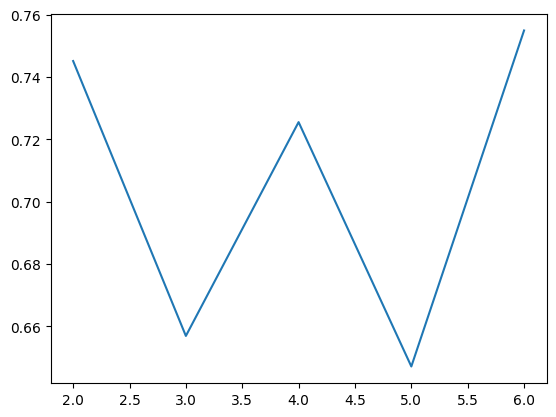

In [ ]:
plt.plot(l,accuracy_list)

In [ ]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=lg.predict(x_test)
accuracy_lg=accuracy_score(y_test,y_pred)

In [ ]:
print(accuracy_lg)

0.6862745098039216


In [ ]:
l_report =classification_report(y_test,y_pred)
print(l_report)

              precision    recall  f1-score   support

         0.0       0.69      0.69      0.69        51
         1.0       0.69      0.69      0.69        51

    accuracy                           0.69       102
   macro avg       0.69      0.69      0.69       102
weighted avg       0.69      0.69      0.69       102



In [ ]:
cml=confusion_matrix(y_test,y_pred)
print(cml)

[[35 16]
 [16 35]]


# **4 . Reduce the dimension with PCA**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
x_train_pac = pca.fit_transform(x_train)
x_test_pac = pca.transform(x_test)

# **5 . Train SVM, KNN, Logistic regression and find accuracy**

In [ ]:
svc=SVC()
svc.fit(x_train_pca,y_train)

SVC()

In [ ]:
y_pred=svc.predict(x_test_pca)
accuracy_svc=accuracy_score(y_test,y_pred)

In [ ]:
print(accuracy_svc)

0.6568627450980392


In [ ]:
c_report =classification_report(y_test,y_pred)
print(c_report)

              precision    recall  f1-score   support

         0.0       0.64      0.71      0.67        51
         1.0       0.67      0.61      0.64        51

    accuracy                           0.66       102
   macro avg       0.66      0.66      0.66       102
weighted avg       0.66      0.66      0.66       102



In [ ]:
c_m=confusion_matrix(y_test,y_pred)
print(c_m)

[[36 15]
 [20 31]]


In [ ]:
accuracy_list=[]
l=[]
for i in range(1,6):
  bkn=KNeighborsClassifier(n_neighbors=i)
  bkn.fit(x_train_pca,y_train)
  accuracy_list.append([bkn.score(x_test_pca,y_test)])
  l.append(i+1)

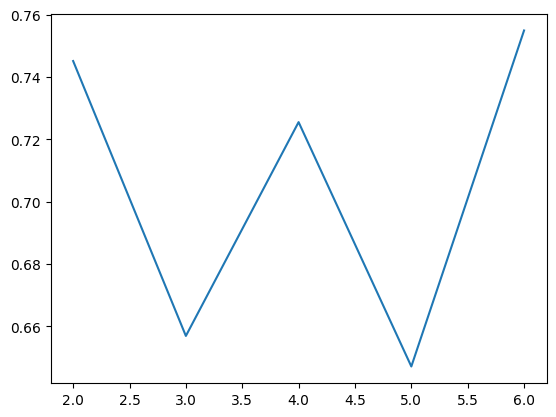

In [ ]:
plt.plot(l,accuracy_list)

In [ ]:
lg=LogisticRegression()
lg.fit(x_train_pca,y_train)

LogisticRegression()

In [ ]:
y_pred=lg.predict(x_test_pca)
accuracy_lg=accuracy_score(y_test,y_pred)

In [ ]:
print(accuracy_lg)

0.6862745098039216


In [ ]:
cl_report =classification_report(y_test,y_pred)
print(cl_report)

              precision    recall  f1-score   support

         0.0       0.69      0.69      0.69        51
         1.0       0.69      0.69      0.69        51

    accuracy                           0.69       102
   macro avg       0.69      0.69      0.69       102
weighted avg       0.69      0.69      0.69       102



In [ ]:
cml=confusion_matrix(y_test,y_pred)
print(cml)

[[35 16]
 [16 35]]
